## Pranav Bhagat

In [1]:
import pandas as pd

In [10]:
hour = pd.read_csv('hourly.csv')
#day = pd.read_csv('daily.csv')

In [11]:
hour.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [128]:
hour['cnt'].max()

249

In [129]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
instant       500 non-null int64
dteday        500 non-null object
season        500 non-null int64
yr            500 non-null int64
mnth          500 non-null int64
hr            500 non-null int64
holiday       500 non-null int64
weekday       500 non-null int64
workingday    500 non-null int64
weathersit    500 non-null int64
temp          500 non-null float64
atemp         500 non-null float64
hum           500 non-null float64
windspeed     500 non-null float64
casual        500 non-null int64
registered    500 non-null int64
cnt           500 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 66.5+ KB


In [13]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

## Extra Trees Classifier for feature selection

In [16]:
#Y = list(zip(Count))

In [17]:
#X = list(zip(Hour,Wind,Temp,Reg,Casual,Humidity,Atemp))

In [18]:
hour = hour1.head(500)

In [19]:
X = hour[hour.columns[2:16]] 
Y = hour.iloc[:,-1]

[0.         0.         0.         0.14482542 0.00605597 0.06469316
 0.01954218 0.04138609 0.09194028 0.1066416  0.1082499  0.11095309
 0.11586172 0.18985061]


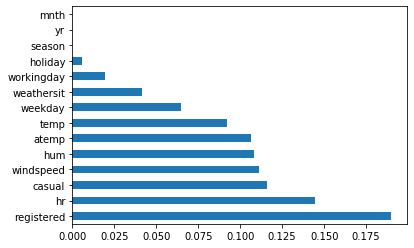

season        0.000000
yr            0.000000
mnth          0.000000
hr            0.144825
holiday       0.006056
weekday       0.064693
workingday    0.019542
weathersit    0.041386
temp          0.091940
atemp         0.106642
hum           0.108250
windspeed     0.110953
casual        0.115862
registered    0.189851
dtype: float64


In [20]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_, index = X.columns)
feat_importance.nlargest(20).plot(kind = 'barh')

plt.show()
print(feat_importance)

In [21]:
fi1 = feat_importance.astype(str)
f12 = feat_importance.to_frame()
f13 = f12.sort_values(by = 0, axis = 0, ascending = False)
f13

,0
registered,0.189851
hr,0.144825
casual,0.115862
windspeed,0.110953
hum,0.108250
atemp,0.106642
temp,0.091940
weekday,0.064693
weathersit,0.041386
workingday,0.019542


### These features from top to botton affect the selection process the most 

## Visualization

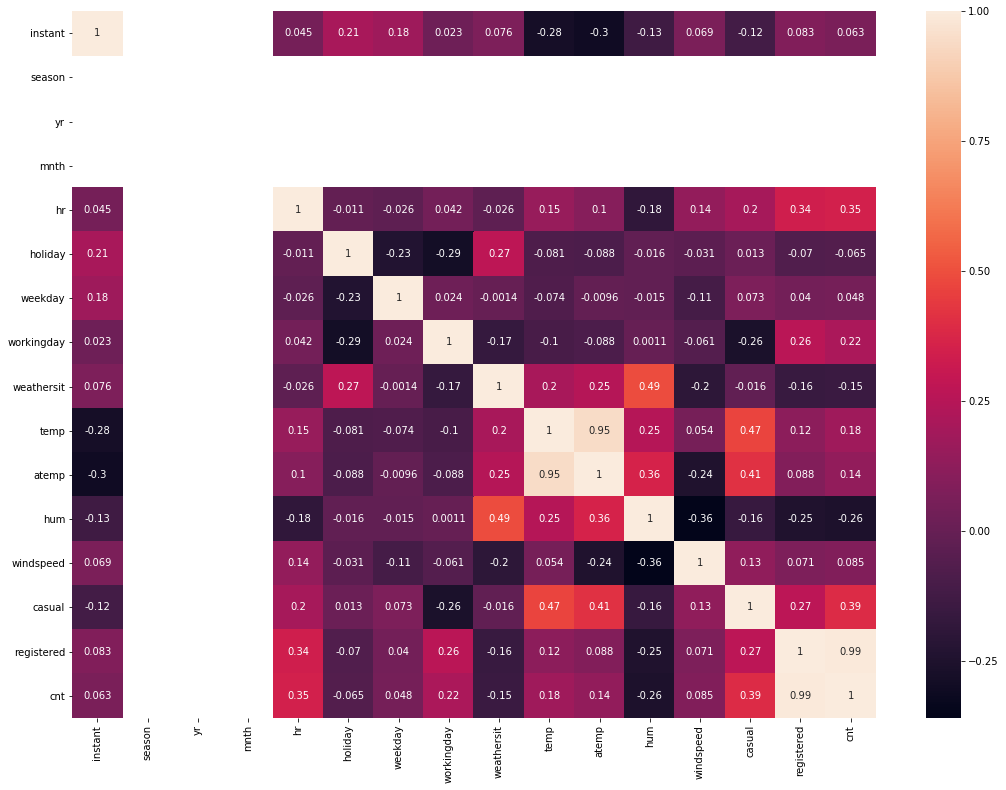

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,13))
sns.heatmap(hour.corr(), annot=True)

### Plot for first six weeks 

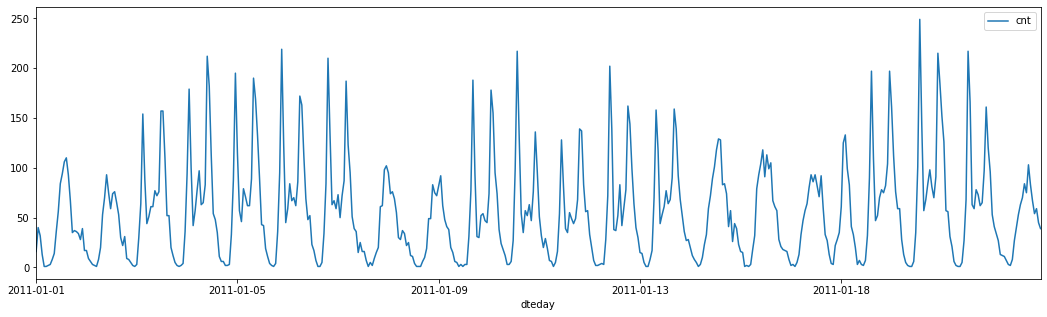

In [133]:
first_6_weeks = 6*7*24 # 3 weeks (7 days), 24 hours each day
hour[:first_6_weeks].plot(x='dteday', y='cnt', figsize=(18, 5))

## 1. Linear Regression

In [69]:
hour2 = pd.DataFrame(hour, columns=["windspeed","hr","hum","atemp",'temp'])
hour3 = pd.DataFrame(hour, columns=["cnt"])

In [70]:
X = hour2
Y = hour3

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [72]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)

In [73]:
predictions = lm.predict(X)

In [74]:
ALR = lm.score(X,Y)

In [77]:
print('Accuracy of the model is :', round(ALR*100),'%')

Accuracy of the model is : 20.0 %


## 2. Gaussian NB

In [40]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()

model2.fit(X,Y)

yprediction2 = model2.predict(X)

C:\Users\Pranav\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
print("Accuracy of the model is:",round(metrics.accuracy_score(Y, yprediction2)*100,2),'%')

Accuracy of the model is: 29.4 %


## 3. Random Forest

In [52]:
raw = pd.read_csv('hourly.csv')

In [53]:
def generate_dummies(df, dummy_column):
    dummies = pd.get_dummies(df[dummy_column], prefix=dummy_column)
    df = pd.concat([df, dummies], axis=1)
    return df

X = pd.DataFrame.copy(raw)
dummy_columns = ["season", "yr", "mnth", "hr", "weekday", "weathersit"]
for dummy_column in dummy_columns:
    X = generate_dummies(X, dummy_column)

In [54]:
for dummy_column in dummy_columns:
    del X[dummy_column]

In [55]:
y = X['cnt']
del X['cnt']
del X['casual']
del X['registered']
del X['instant']
del X['dteday']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22, test_size = 0.2)

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

regressor = RandomForestRegressor()
parameters = [{'n_estimators' : [30,70], 'max_features' : ['auto','sqrt','log2']}]
grid_search = GridSearchCV(estimator = regressor, param_grid = parameters)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [66]:
print('Highest Accuracy achieved in model is ', round(best_accuracy*100,2),'%')

Highest Accuracy achieved in model is  91.63 %


In [82]:
regressor = RandomForestRegressor(n_estimators = 300, max_features = 'auto') 
regressor.fit(X_train,y_train)

# Predicting the values 

y_pred = regressor.predict(X_test) 

C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [122]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv =10, verbose = 0)

C:\Users\Pranav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pranav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pranav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pranav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

In [123]:
YT1 = y_test['cnt']

In [124]:
Y_tst

array([425,  88,   4, ..., 556, 312,  72], dtype=int64)

In [125]:
df = pd.DataFrame({'Actual': YT1, 'Predicted': y_pred})
df

,Actual,Predicted
90,35,37.696667
254,19,14.393333
283,28,26.230000
445,81,83.343333
461,27,28.583333
15,110,67.686667
316,90,74.760000
489,63,51.804000
159,36,28.586667
153,87,78.033333


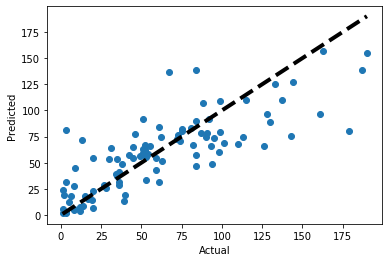

In [136]:
fig, ax = plt.subplots()
ax.scatter(df['Actual'], df['Predicted'])
ax.plot([df['Actual'].min(),df['Actual'].max()], [df['Actual'].min(),df['Actual'].max()], 'k--', lw =4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()